In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import * 

### Load Data

In [2]:
def process_input(X):
    X_norm = X.astype('float32') / 255.0
    return X_norm

def process_output(y):
    return y, np.array([[1, 1, 26, 26] for _ in range(len(y))], dtype='uint8')

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

X_train = process_input(X_train)
X_test = process_input(X_test)

y_train = process_output(y_train)
y_test = process_output(y_test)

# Branching Models

In [4]:
input_layer = layers.Input(shape=(28,28))

In [5]:
flatten_layer = layers.Flatten()(input_layer)
dense_layer = layers.Dense(32, activation='relu')(flatten_layer)

Metal device set to: Apple M1


2022-01-27 12:05:18.037504: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-27 12:05:18.037588: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
output_layer1 = layers.Dense(10, activation='softmax', name='output1')(dense_layer)
output_layer2 = layers.Dense(4, activation='linear', name='output2')(dense_layer)

In [7]:
branched_model = models.Model(inputs=input_layer, outputs=[output_layer1, output_layer2])

In [8]:
branched_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten (Flatten)              (None, 784)          0           ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 32)           25120       ['flatten[0][0]']                
                                                                                                  
 output1 (Dense)                (None, 10)           330         ['dense[0][0]']                  
                                                                                              

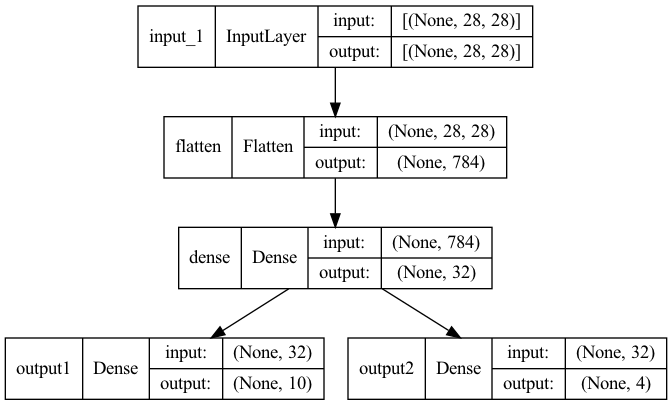

In [9]:
tf.keras.utils.plot_model(branched_model, show_shapes=True)